# Exploring IGoR's Inferred Models

With IGoR is possible to infer a V(D)J recombination model given sequences data.
This models can be defined by the user or use the default models within IGoR to evaluate a model.
IGoR's models are specified in 2 files "model_parms.txt" and "model_marginals.txt"

* model_parms.txt: Contains parameters used in the model and the structure of the bayesian network.
* model_marginals.txt: Contains the NOT the probability marginals, it contains the conditional probabilities factorized in the bayesian network.

In this tutorial we gonna start with the IGoR's default models and use pygor3 package to make visualizations of these inferred models.

If you have IGoR installed in your computer (IGoR's version >= 1.4.1) pygor3 can detect automatically your default models directory.
Now, lets try to load a model for human species and tcr_beta chain

In [1]:
import pygor3 as p3

In [20]:
species="human"
chain="tcr_beta"
mdl = p3.IgorModel.load_default(species, chain)

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


Now, we load the information of the model in the mdl variable. 
Notice that once you load a model pygor3 outputs the path of the files used, and all information in both files is encapsulated in the variable "mdl"

In particular all the information of conditional probabilities are in mdl.xdata. mdl.xdata is a dictionary with xarray structures.

In [3]:
mdl.xdata.keys()

dict_keys(['v_choice', 'j_choice', 'd_gene', 'v_3_del', 'd_5_del', 'd_3_del', 'j_5_del', 'vd_ins', 'vd_dinucl', 'dj_ins', 'dj_dinucl'])

## Structure of the Model

We can visualize the structure of the IGoR bayesian model by using plot_Bayes_network()

<AxesSubplot:>

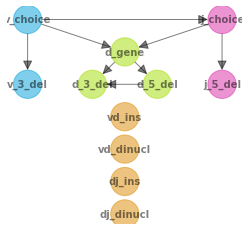

In [4]:
mdl.plot_Bayes_network()

In [ ]:
With this we can see the nickname of the events and explore the contained information.


To get the conditional probabilities of an specific event we could use mdl.xdata["event_nickname"] or simply
mdl["event_nickname"]

In [5]:
mdl['j_choice']

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[1.28586e-01, 1.04003e-01, 4.10916e-02, ..., 0.00000e+00,
        5.36364e-02, 3.73186e-02],
       [1.66126e-01, 7.89615e-02, 1.13701e-02, ..., 2.46074e-02,
        6.49049e-02, 7.46140e-02],
       [1.66156e-01, 7.90103e-02, 1.13744e-02, ..., 2.45354e-02,
        6.49334e-02, 7.46554e-02],
       ...,
       [1.24050e-01, 4.76394e-02, 0.00000e+00, ..., 3.52196e-02,
        5.51254e-02, 6.01472e-02],
       [3.64941e-06, 2.04721e-09, 0.00000e+00, ..., 3.41728e-01,
        6.84855e-02, 8.22442e-02],
       [1.06077e-01, 1.13773e-01, 4.03129e-02, ..., 2.20679e-02,
        7.16947e-02, 5.81105e-02]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION...
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

The last steps returns a xarray structure with the information about the conditional probability P(j_choice|v_choice). From this you can get the seqs and labels of the gene events

In [63]:
mdl['j_choice'].dims

('v_choice', 'j_choice')

In [64]:
mdl['j_choice']['j_choice']

<xarray.DataArray 'j_choice' (j_choice: 15)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

In [6]:
mdl['j_choice']['lbl__j_choice']

<xarray.DataArray 'lbl__j_choice' (j_choice: 15)>
array(['K02545|TRBJ1-1*01|Homo sapiens|F|J-REGION|749..796|48 nt|3| | | | |48+0=48| | |',
       'K02545|TRBJ1-2*01|Homo sapiens|F|J-REGION|886..933|48 nt|3| | | | |48+0=48| | |',
       'M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499..1548|50 nt|2| | | | |50+0=50| | |',
       'M14158|TRBJ1-4*01|Homo sapiens|F|J-REGION|2095..2145|51 nt|3| | | | |51+0=51| | |',
       'M14158|TRBJ1-5*01|Homo sapiens|F|J-REGION|2368..2417|50 nt|2| | | | |50+0=50| | |',
       'M14158|TRBJ1-6*01|Homo sapiens|F|J-REGION|2859..2911|53 nt|2| | | | |53+0=53| | |',
       'L36092|TRBJ1-6*02|Homo sapiens|F|J-REGION|643043..643095|53 nt|2| | | | |53+0=53| | |',
       'X02987|TRBJ2-1*01|Homo sapiens|F|J-REGION|800..849|50 nt|2| | | | |50+0=50| | |',
       'X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |',
       'X02987|TRBJ2-3*01|Homo sapiens|F|J-REGION|1282..1330|49 nt|1| | | | |49+0=49| | |',
       'X02987|TRBJ2-4*01|Homo sapiens|F|J-REGION|1432..1481|50 nt|2| | | | |50+0=50| | |',
       'X02987|TRBJ2-5*01|Homo sapiens|F|J-REGION|1553..1600|48 nt|3| | | | |48+0=48| | |',
       'X02987|TRBJ2-6*01|Homo sapiens|F|J-REGION|1673..1725|53 nt|2| | | | |53+0=53| | |',
       'M14159|TRBJ2-7*01|Homo sapiens|F|J-REGION|2316..2362|47 nt|2| | | | |47+0=47| | |',
       'X02987|TRBJ2-7*02|Homo sapiens|ORF|J-REGION|1890..1936|47 nt|2| | | | |47+0=47| | |'],
      dtype=object)
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

In [66]:
mdl['j_choice']['seq__j_choice']

<xarray.DataArray 'seq__j_choice' (j_choice: 15)>
array(['TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCACAGTTGTAG',
       'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG',
       'CTCTGGAAACACCATATATTTTGGAGAGGGAAGTTGGCTCACTGTTGTAG',
       'CAACTAATGAAAAACTGTTTTTTGGCAGTGGAACCCAGCTCTCTGTCTTGG',
       'TAGCAATCAGCCCCAGCATTTTGGTGATGGGACTCGACTCTCCATCCTAG',
       'CTCCTATAATTCACCCCTCCACTTTGGGAATGGGACCAGGCTCACTGTGACAG',
       'CTCCTATAATTCACCCCTCCACTTTGGGAACGGGACCAGGCTCACTGTGACAG',
       'CTCCTACAATGAGCAGTTCTTCGGGCCAGGGACACGGCTCACCGTGCTAG',
       'CGAACACCGGGGAGCTGTTTTTTGGAGAAGGCTCTAGGCTGACCGTACTGG',
       'AGCACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCG',
       'AGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG',
       'ACCAAGAGACCCAGTACTTCGGGCCAGGCACGCGGCTCCTGGTGCTCG',
       'CTCTGGGGCCAACGTCCTGACTTTCGGGGCCGGCAGCAGGCTGACCGTGCTGG',
       'CTCCTACGAGCAGTACTTCGGGCCGGGCACCAGGCTCACGGTCACAG',
       'CTCCTACGAGCAGTACGTCGGGCCGGGCACCAGGCTCACGGTCACAG'], dtype=object)
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

To get specific probability values a python dictionary is used to query a specific probability.
Example: to get the J gene with id 0 given that V with id 2 has choosen.

In [7]:
mdl['j_choice'][{'j_choice':0, 'v_choice':2}]

<xarray.DataArray ()>
array(0.166156)
Coordinates:
    v_choice       int64 2
    lbl__v_choice  object 'AF009660|TRBV10-1*02|Homo sapiens|F|V-REGION|54913...
    seq__v_choice  object 'GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAGGAAG...
    j_choice       int64 0
    lbl__j_choice  object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGION|749..796...
    seq__j_choice  object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCACAGTTGTAG'
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

As you can see from the Bayesian network plot, j_choice has parents and childs, and this information is stored as an attribute in the xarray structure among other informations.

In [8]:
mdl['j_choice'].attrs

{'nickname': 'j_choice',
 'event_type': 'GeneChoice',
 'seq_type': 'J_gene',
 'seq_side': 'Undefined_side',
 'priority': 7,
 'parents': ['v_choice'],
 'childs': ['j_5_del', 'd_gene']}

Notice that this operation preserve the labels and sequence and id of the events.
From this point you can explore model as you which. For instance you can calculate the marginal probability of 'j_choice'.

As can be seen 'j_choice' parent is only 'v_choice' and because 'v_choice' has no parents then the marginal for this event should be

In [9]:
Pmarginal_j_choice = mdl['j_choice'].dot(mdl['v_choice'])
Pmarginal_j_choice

<xarray.DataArray (j_choice: 15)>
array([0.11962186, 0.10538077, 0.02016188, 0.05684014, 0.09945672,
       0.03726745, 0.0322361 , 0.12542452, 0.05034454, 0.09853381,
       0.01948227, 0.07500318, 0.0190534 , 0.0709002 , 0.07029376])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

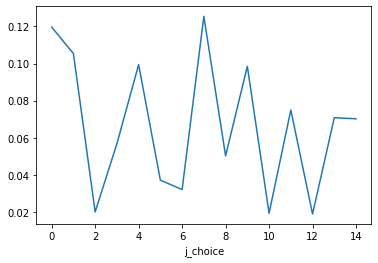

In [10]:
Pmarginal_j_choice.plot()

However, pygor3 calculates the marginals when a new model is load and is stored in the dictionary parameter Pmarginal and a way to plot it using the method plot_Event_Marginal

In [11]:
mdl.Pmarginal['j_choice']

<xarray.DataArray (j_choice: 15)>
array([0.1196221 , 0.105381  , 0.02016193, 0.05684022, 0.09945699,
       0.03726755, 0.03223616, 0.12542481, 0.05034467, 0.09853413,
       0.0194823 , 0.07500332, 0.01905345, 0.0709004 , 0.07029394])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

<AxesSubplot:xlabel='j choice', ylabel='P'>

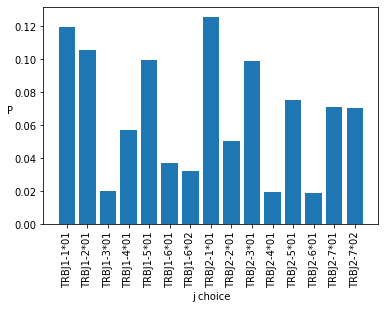

In [12]:
mdl.plot_Event_Marginal('j_choice')

### Export models

Models can be exported to pandas dataframes in case you need it and then exporte it to a file manually or you can use the export-model pygor3 script

In [13]:
df_ev = mdl.Pmarginal['v_choice'].to_dataframe(name='P')
df_ev.head()

,lbl__v_choice,seq__v_choice,P
v_choice,,,
0,U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723....,GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...,0.004887
1,U66059|TRBV10-1*01|Homo sapiens|F|V-REGION|214...,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,0.009324
2,AF009660|TRBV10-1*02|Homo sapiens|F|V-REGION|5...,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,0.009323
3,AF009660|TRBV10-1*04|Homo sapiens|F|V-REGION|5...,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,0.013032
4,U66059|TRBV10-2*01|Homo sapiens|F|V-REGION|239...,GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...,0.000343


## Plotting models

The plot_Event_Marginal can be personalized if an matplotlib axes object is pass in the paramter ax.

### Plotting GeneChoice marginals

<AxesSubplot:xlabel='d gene', ylabel='P'>

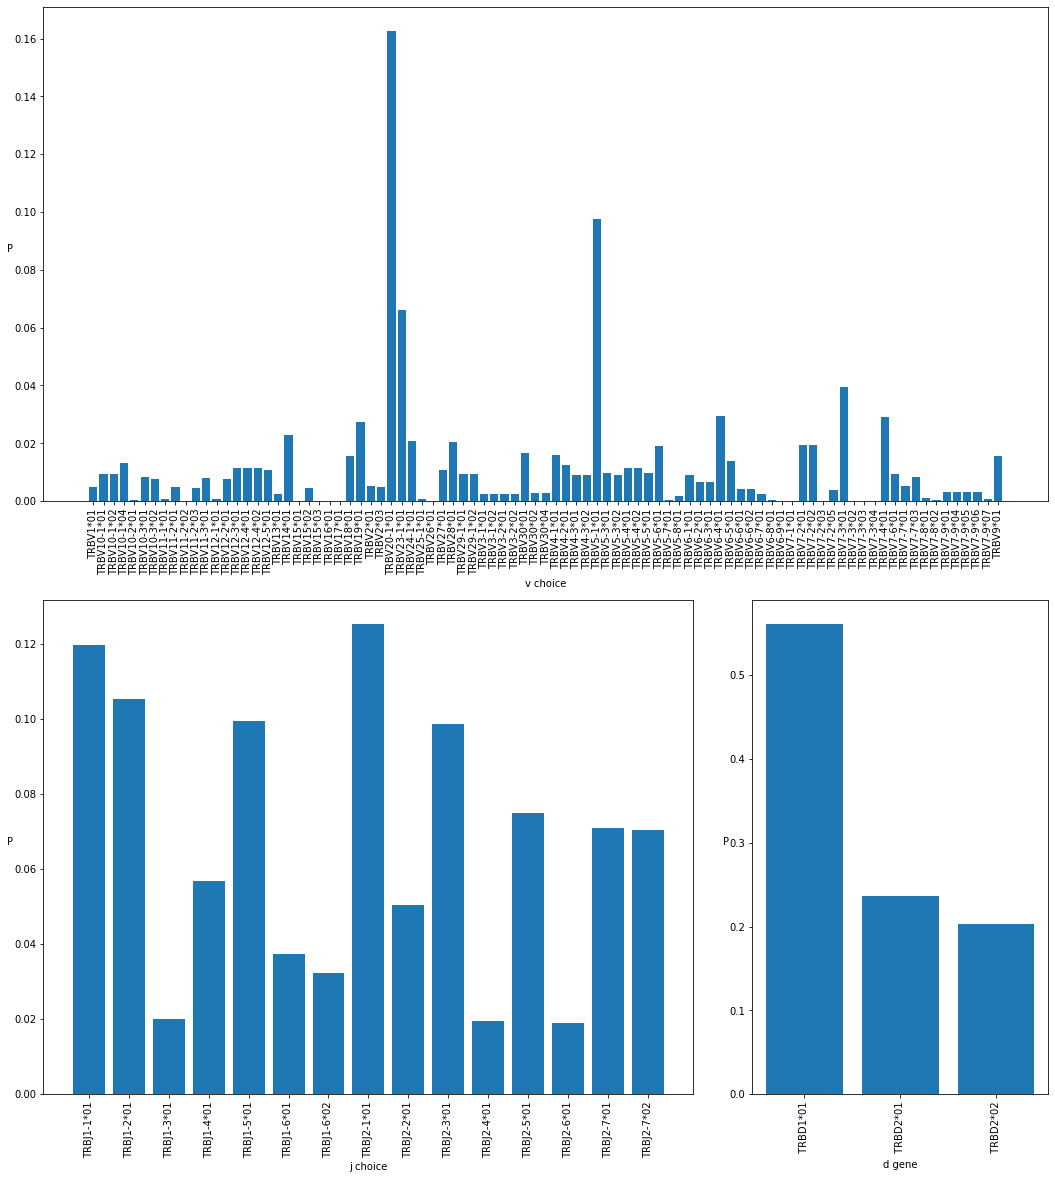

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 20))
grid = plt.GridSpec(2, 3, hspace=0.2, wspace=0.2)
grid
ax_v = fig.add_subplot(grid[0, :])
ax_j = fig.add_subplot(grid[1, 0:2])
ax_d = fig.add_subplot(grid[1, 2])

mdl.plot_Event_Marginal('v_choice', ax=ax_v)
mdl.plot_Event_Marginal('j_choice', ax=ax_j)
mdl.plot_Event_Marginal('d_gene', ax=ax_d)

### Plotting Insertions and deletions marginals

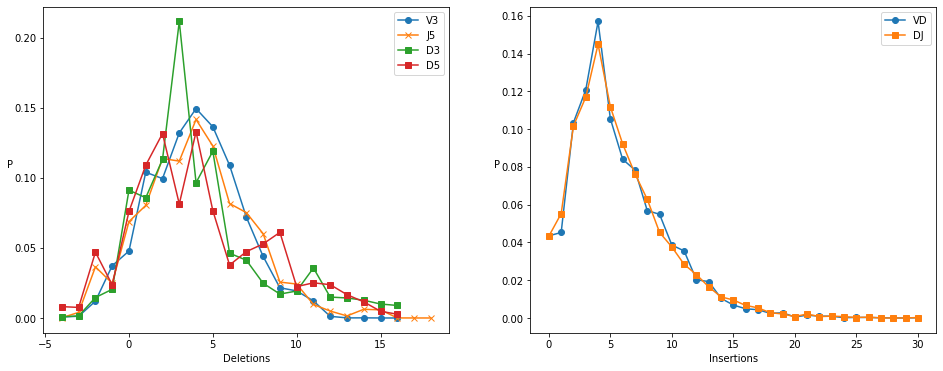

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
mdl.plot_Event_Marginal('v_3_del', ax=ax[0], marker='o', label='V3')
mdl.plot_Event_Marginal('j_5_del', ax=ax[0], marker='x', label='J5')
mdl.plot_Event_Marginal('d_3_del', ax=ax[0], marker='s', label='D3')
mdl.plot_Event_Marginal('d_5_del', ax=ax[0], marker='s', label='D5')
ax[0].set_xlabel("Deletions")
ax[0].legend()

mdl.plot_Event_Marginal('vd_ins', ax=ax[1], marker='o', label='VD')
mdl.plot_Event_Marginal('dj_ins', ax=ax[1], marker='s', label='DJ')
ax[1].set_xlabel("Insertions")
ax[1].legend()

### Plotting DinucMarkov marginals

<AxesSubplot:title={'center':'dj dinucl'}, xlabel='From', ylabel='To'>

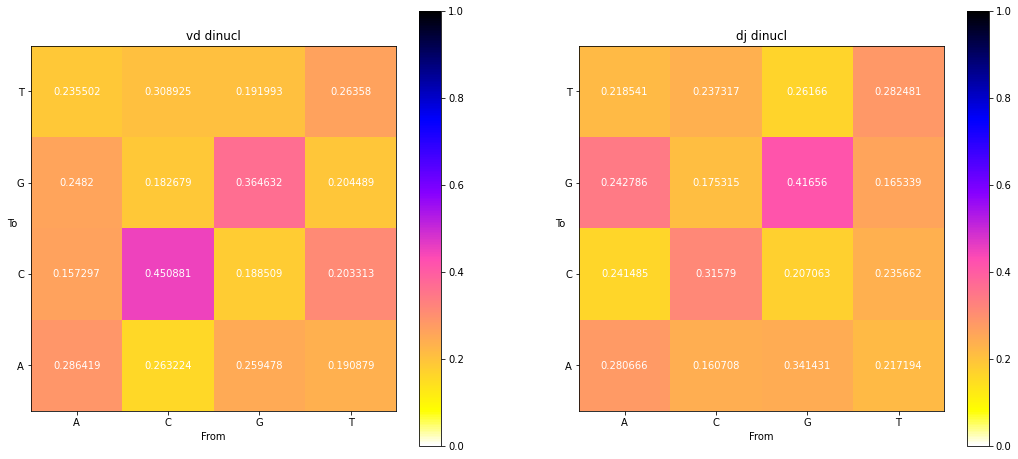

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
mdl.plot_Event_Marginal('vd_dinucl', ax=ax[0])
mdl.plot_Event_Marginal('dj_dinucl', ax=ax[1])

### Conditional Probabilities

In [17]:
event_nickname='d_3_del'
mdl[event_nickname]

<xarray.DataArray (d_gene: 3, d_5_del: 21, d_3_del: 21)>
array([[[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.19224e-01,
         2.89631e-01, 2.11165e-01],
        [0.00000e+00, 0.00000e+00, 6.86291e-08, ..., 1.38170e-01,
         3.02534e-01, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 1.09220e-03, ..., 4.41026e-02,
         0.00000e+00, 0.00000e+00],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]],

       [[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.11468e-03,
         5.71094e-03, 7.95666e-02],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.50811e-02,
         8.09057e-02, 7.76708e-01],
        [0.00000e+00, 0.00000e+00, 3.94418e-06, ..., 2.35577e-03,
         5.88810e-02, 7.62736e-02],
...
        [0.00000e+00, 0.00000e+00, 1.25405e-01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]],

       [[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.51398e-04,
         1.89857e-02, 6.63111e-01],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.29730e-02,
         2.58015e-02, 9.39715e-01],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.20776e-02,
         1.25424e-01, 1.52907e-01],
        ...,
        [0.00000e+00, 0.00000e+00, 1.62236e-01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00]]])
Coordinates:
  * d_gene        (d_gene) int64 0 1 2
    lbl__d_gene   (d_gene) object ' TRBD1*01' ' TRBD2*01' ' TRBD2*02'
    seq__d_gene   (d_gene) object 'GGGACAGGGGGC' ... 'GGGACTAGCGGGAGGG'
  * d_5_del       (d_5_del) int64 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
    lbl__d_5_del  (d_5_del) int64 -4 -3 -2 -1 0 1 2 3 ... 9 10 11 12 13 14 15 16
  * d_3_del       (d_3_del) int64 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
    lbl__d_3_del  (d_3_del) int64 -4 -3 -2 -1 0 1 2 3 ... 9 10 11 12 13 14 15 16
Attributes:
    nickname:    d_3_del
    event_type:  Deletion
    seq_type:    D_gene
    seq_side:    Three_prime
    priority:    5
    parents:     ['d_gene', 'd_5_del']
    childs:      []

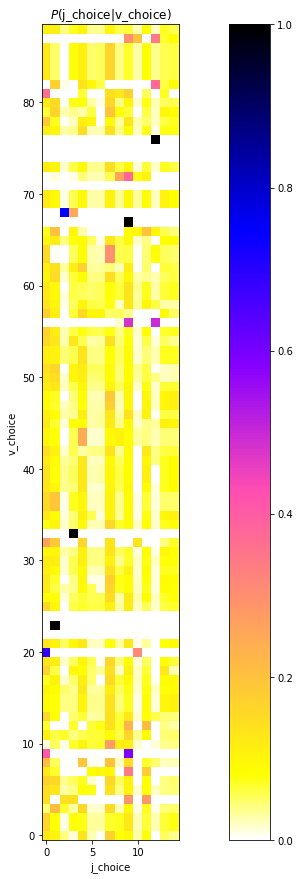

In [15]:
fig, ax = plt.subplots(figsize=(18,15))
event_nickname='j_choice'
mdl[event_nickname].plot(ax=ax, cmap='gnuplot2_r')
titulo = "$P($"+event_nickname+"$|$"+",".join(mdl[event_nickname].attrs['parents'])+"$)$"
ax.set_title(titulo)
ax.set_aspect('equal')

In [104]:
event_nickname
# mdl[event_nickname].plot()

'j_choice'

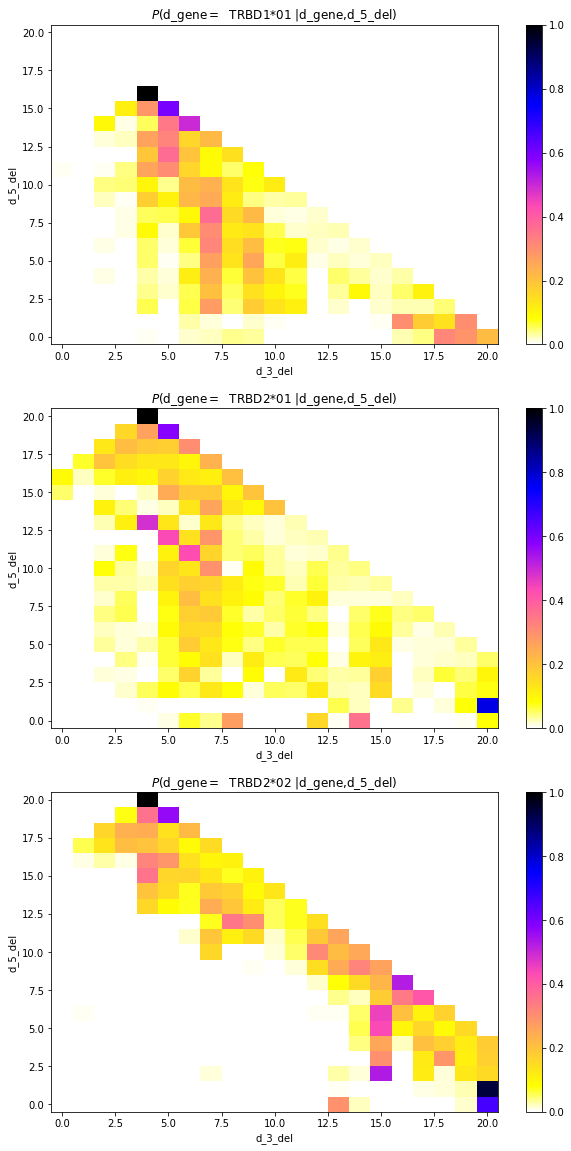

In [18]:
import matplotlib.pyplot as plt
# mdl[event_nickname].dims
da = mdl[event_nickname]
event_nickname='d_gene'
fig, ax = plt.subplots(*da[event_nickname].shape, figsize=(10,20))

for ii, ev_realiz in enumerate(da[event_nickname]):
    #print(ev_realiz.values)
    da[{event_nickname: ev_realiz.values}].plot(ax=ax[ii], cmap='gnuplot2_r')
    titulo = "$P($" + event_nickname + "$ = $ " +ev_realiz["lbl__"+event_nickname].values + " $|$" + ",".join(da.attrs['parents']) + "$)$"
    ax[ii].set_title(titulo)
    

In [19]:
mdl['v_3_del']

<xarray.DataArray (v_choice: 89, v_3_del: 21)>
array([[0.00000e+00, 6.54915e-07, 7.92957e-03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.84967e-05, 8.95309e-09, 2.40350e-02, ..., 1.95346e-44,
        0.00000e+00, 0.00000e+00],
       [6.85460e-05, 8.50654e-09, 2.40414e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [4.47230e-07, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.62925e-03, 0.00000e+00, 7.77369e-04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION...
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * v_3_del        (v_3_del) int64 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
    lbl__v_3_del   (v_3_del) int64 -4 -3 -2 -1 0 1 2 3 ... 10 11 12 13 14 15 16
Attributes:
    nickname:    v_3_del
    event_type:  Deletion
    seq_type:    V_gene
    seq_side:    Three_prime
    priority:    5
    parents:     ['v_choice']
    childs:      []